<a href="https://colab.research.google.com/github/mongbro/colab/blob/main/02_Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Keras CNN으로 패션 아이템 구분하기

1. 패키지 수입 및 파라미터 지정

In [ ]:
# 패키지 수입
import matplotlib.pyplot as plt
import numpy as np

from time import time
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.utils import np_utils

from keras.layers import Flatten
from keras.layers import Dense, MaxPool2D, Conv2D, InputLayer

In [ ]:
# 파라미터 지정
MY_EPOCH = 10
MY_BATCH = 500


2.데이터 불러오기

In [ ]:
# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

print('학습용 입력 데이터 :', X_train.shape)
print('학습용 출력 데이터 :', Y_train.shape)
print('평가용 입력 데이터 :', X_test.shape)
print('평가용 출력 데이터 :', Y_test.shape)

학습용 입력 데이터 : (60000, 28, 28)
학습용 출력 데이터 : (60000,)
평가용 입력 데이터 : (10000, 28, 28)
평가용 출력 데이터 : (10000,)


학습용 데이터 첫번째 이미지 화소 정보
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1 

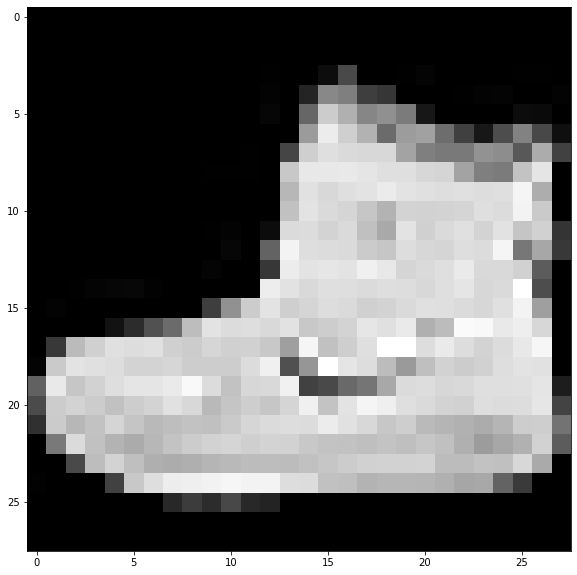

In [ ]:
# 데이터 샘플 출력
print('학습용 데이터 첫번째 이미지 화소 정보')
print(X_train[0])
plt.figure(figsize = (10, 10))
plt.imshow(X_train[0], cmap = 'gray')
print('학습용 데이터 첫번째 이미지의 라벨 : ', Y_train[0])

In [ ]:
# 데이터 스케일링
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = (X_train - 0.5) * 2
X_test = (X_test - 0.5) * 2
print(X_train[0])

# 데이터 모양 정보 전환 ( == 이미지 채널 정보 추가)
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
        # (6000, 28, 28) 3차원 => (60000, 28, 28, 1) 4차원   마지막 1은 채널정보

[[-1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.        ]
 [-1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.        ]
 [-1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.        ]
 [-1.         -1.         -1.         -1.         -1.  

In [ ]:
# 라벨 정보 수정
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)
                    # categorical => one hot encoding 하는 것
print('학습용 데이터 첫번째 이미지의 라벨 : ', Y_train[0])

print('학습용 입력 데이터 :', X_train.shape)
print('학습용 출력 데이터 :', Y_train.shape)
print('평가용 입력 데이터 :', X_test.shape)
print('평가용 출력 데이터 :', Y_test.shape)

학습용 데이터 첫번째 이미지의 라벨 :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
학습용 입력 데이터 : (60000, 28, 28, 1)
학습용 출력 데이터 : (60000, 10)
평가용 입력 데이터 : (10000, 28, 28, 1)
평가용 출력 데이터 : (10000, 10)


3. 인공 신경망 구현

In [ ]:
# CNN 구현
model = Sequential()
model.add(InputLayer(input_shape = (28,28,1)))

# 첫번째 합성곱 블록
model.add(Conv2D(filters = 32, kernel_size = 2, padding = 'same', activation = 'tanh'))
              #   (28, 28, 1) => (28, 28, 32)

model.add(MaxPool2D(pool_size = 2))     # pool_size == window_size
              #   (28, 28, 1) => (28, 28, 32) => (14, 14, 32)

# 두번째 합성곱 블록
model.add(Conv2D(filters = 64, kernel_size = 2, padding = 'same', activation = 'tanh'))
              #   (28, 28, 1) => (28, 28, 32) => (14, 14, 32) => (14, 14, 64)

model.add(MaxPool2D(pool_size = 2))
              #   (28, 28, 1) => (28, 28, 32) => (14, 14, 32) => (14, 14, 64) => (7, 7, 64)


#DNN 입성
model.add(Flatten())
              #   (7, 7, 64) => 3136

model.add(Dense(units = 128, activation ='tanh'))
              # 3136 * 128 + 128 = 401536

model.add(Dense(units = 10, activation = 'softmax'))
              # => 확률이 가장 큰 값
              
print('CNN 요약')
model.summary()

CNN 요약
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               401536    
_________________________________________________________________
dense_15 (Dense)             (None, 10)        

4. 인공 신경망 학습

In [ ]:
# keras에서 인공신경망 학습 및 평가 순서
      # 1. compile    최적화, 손실 함수 지정
      # 2. fit        학습, epoch/batch             => 학습용 데이터(X_train, Y_train) 
      # 3. evaluate   평가                          => 평가용 데이터(X_test, Y_test)
      # 4. predict    평가용의 인풋을 사용해서 예측 

# 학습 방식 설정        # 우리가 실생활에 사용하는 인공신경망의 손실함수는 시작적으로 그릴 수가 없다
                        # 왜? => 극 고차원 함수이기 때문에 가중치가 아주아주 많아서
                        # 인공지능/ 딥러닝에서 최적활 알고리즘(optimized)은 가중치를 어떻게 보정하는지 결정한다
                        # 딥 러닝에서 사용하는 모든 알고리즘 중에서 가장 핵심이 되는 알고리즘이다.
model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])
      # 지금까지 배운 손실함수 : MSE, RMSE, MAE
      # 손실함수 categorical_crossentropy => softmax 한 다음 one-hot encoding함
      # EX) 2.0  1.0  0.1  =>softmax=>  0.7  0.2  0.1  =>one-hot encoding =>  1  0  0
      #    =>  -(log0.7 * 1 + log0.2 * 0 + log0.1 * 0) = -(-0.155 + 0 + 0)
      #        = -(-0.155) = 0.155  <== 교차 엔트로피 손실값

# CNN 학습
print('학습 시작')
begin = time()

model.fit(x = X_train, 
          y = Y_train, 
          epochs = MY_EPOCH, 
          batch_size = MY_BATCH, 
          verbose = 1)      # 학습내용 출력여부(1 : 출력함    0: 출력안함)

end = time()
print('학습시간 : {:.2f}초'.format(end - begin))

# epoch ?/10 아래의 120 은 batch의 수

학습 시작
Epoch 1/10
120/120 [==============================] - 2s 11ms/step - loss: 0.7854 - acc: 0.7258
Epoch 2/10
120/120 [==============================] - 1s 11ms/step - loss: 0.3558 - acc: 0.8746
Epoch 3/10
120/120 [==============================] - 1s 11ms/step - loss: 0.2997 - acc: 0.8908
Epoch 4/10
120/120 [==============================] - 1s 10ms/step - loss: 0.2669 - acc: 0.9027
Epoch 5/10
120/120 [==============================] - 1s 11ms/step - loss: 0.2465 - acc: 0.9108
Epoch 6/10
120/120 [==============================] - 1s 11ms/step - loss: 0.2172 - acc: 0.9224
Epoch 7/10
120/120 [==============================] - 1s 11ms/step - loss: 0.2083 - acc: 0.9249
Epoch 8/10
120/120 [==============================] - 1s 11ms/step - loss: 0.1939 - acc: 0.9306
Epoch 9/10
120/120 [==============================] - 1s 11ms/step - loss: 0.1787 - acc: 0.9355
Epoch 10/10
120/120 [==============================] - 1s 11ms/step - loss: 0.1662 - acc: 0.9409
학습시간 : 13.26초


5. CNN 평가

In [ ]:
# CNN 평가
score = model.evaluate(x = X_test, 
                       y = Y_test,
                       verbose = 1)

print('최종 손실값 : {:.2f}'.format(score[0]))
print('최종 정확도 : {:.2f}'.format(score[1]))


313/313 [==============================] - 1s 2ms/step - loss: 0.2509 - acc: 0.9102
최종 손실값 : 0.25
최종 정확도 : 0.91


6. CNN 예측

(28, 28, 1)
CNN 예측 값 : [[9.0233152e-05 8.6322740e-05 3.2879722e-01 8.8068715e-05 6.5479273e-01
  2.0318575e-06 1.6097931e-02 2.6038042e-06 4.1464304e-05 1.4068644e-06]]
정답 : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


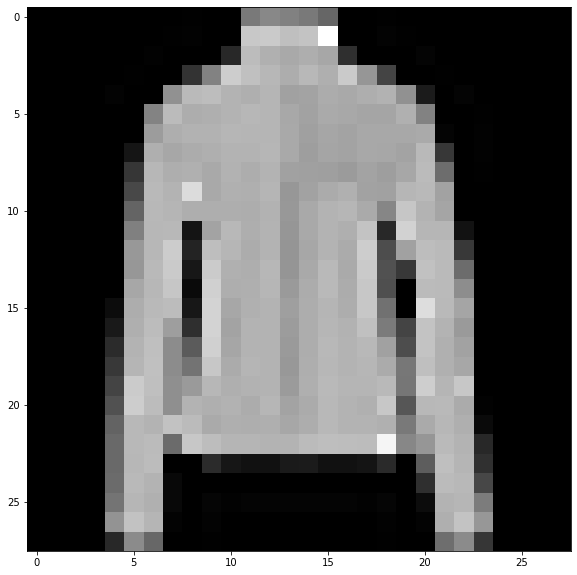

In [ ]:
# 샘플 이미지 지정
image = X_test[1234]
print(image.shape)

# batch 정보 추가
    # 기계 학습에서 batch란?  =>>  학습용 데이터를 몇개 가져와서 계산할 것인가?
    #                               =>>  너무 많아서 나눠서 여러번 가져옴
           # EX) 의자 6만개주문 => 1000개 * 60번 배달  =>  의자주문의 batch = 1000
image = image.reshape(1, 28, 28, 1)
    #     배치정보 => 1, 28, 28, 1 <= 채널정보
pred = model.predict(image)

# 정보 출력
print('CNN 예측 값 :', pred)  # => softmax 된 확률
print('정답 :', Y_test[1234])

plt.figure(figsize = (10, 10))
tmp = X_test[1234].reshape(28,28) * 255
plt.imshow(tmp, cmap = 'gray')